#### Matplotlib’s API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code. Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame,you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

#### Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

###### Seaborn Versus Matplotlib

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

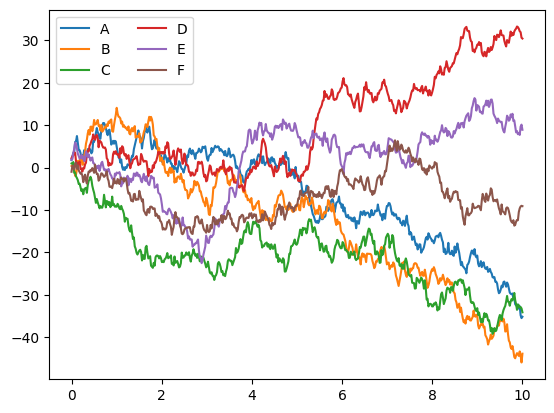

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

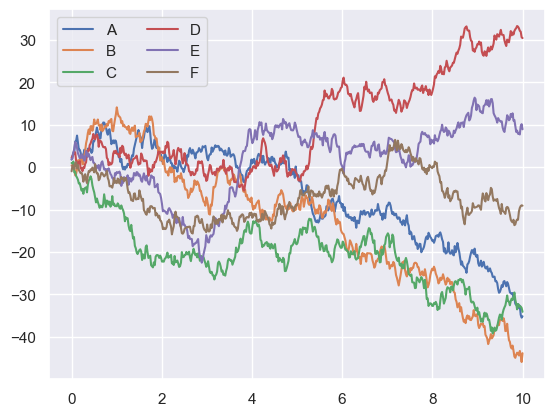

In [3]:
sns.set() #We can set the style by calling Seaborn’s set() method.
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

###### Histograms, KDE, and densities

In [4]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,x,y
0,-3.023348,0.029036
1,0.948136,0.134402
2,2.145075,2.085343
3,0.531238,-1.919145
4,2.713339,3.370381
...,...,...
1995,-1.006021,-1.926471
1996,-0.906203,1.198579
1997,2.152157,1.604462
1998,0.516277,-0.182128


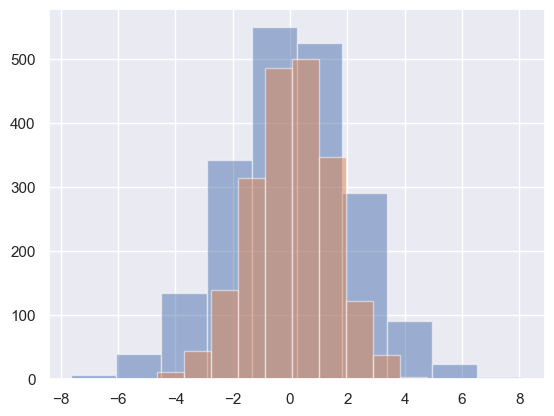

In [5]:
for col in 'xy':
    plt.hist(data[col], alpha=0.5)

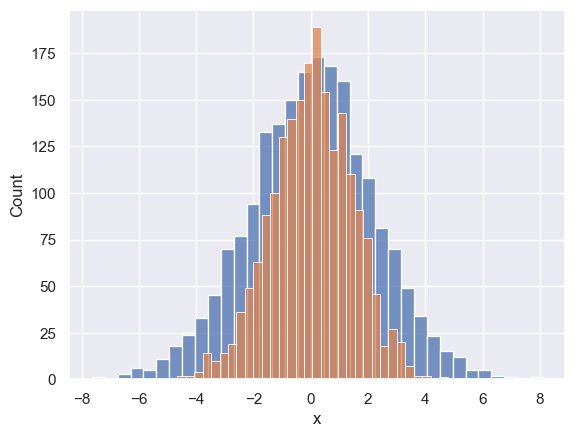

In [6]:
#smooth distribution using kdeplot
for col in 'xy':
    sns.histplot(data[col], fill=True)

/var/folders/6d/wp8xwx1n3v51_tvy5x3nh3pr0000gp/T/ipykernel_8937/4190936067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
/var/folders/6d/wp8xwx1n3v51_tvy5x3nh3pr0000gp/T/ipykernel_8937/4190936067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


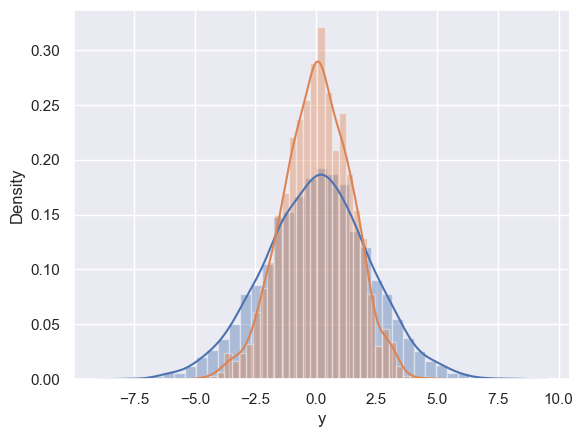

In [7]:
#Histograms and KDE can be combined using distplot
sns.distplot(data['x'])
sns.distplot(data['y']);

<Axes: ylabel='Density'>

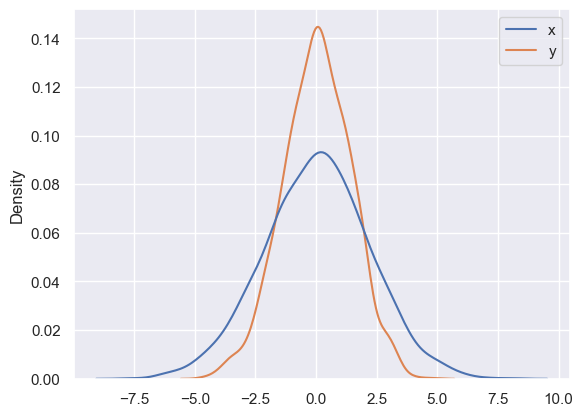

In [8]:
sns.kdeplot(data)

In [9]:
# To know the datasets available in sns
names=sns.get_dataset_names()
names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [10]:
len(names)

88

In [11]:
# Load a sample dataset
df = sns.load_dataset("tips")
mask = np.max(df['tip'])
df[df['tip']==mask]

<IPython.core.display.Javascript object>

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


######  1. Scatter Plot

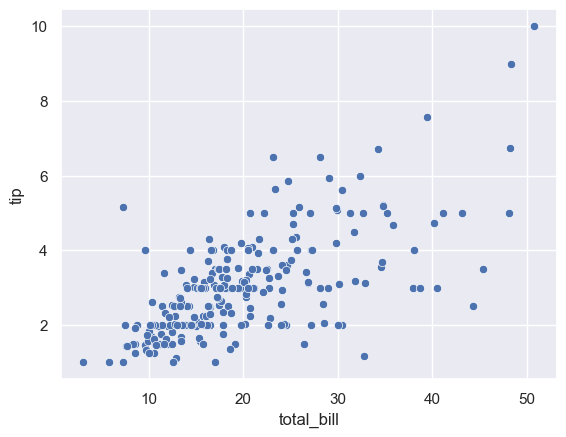

In [12]:
#Used to visualize the relationship between two continuous variables.
sns.scatterplot(x=df["total_bill"],y=df["tip"])
#sns.scatterplot(x="total_bill", y="tip", data=df)
plt.show()

###### 2. Line Plot

/var/folders/6d/wp8xwx1n3v51_tvy5x3nh3pr0000gp/T/ipykernel_8937/4266251333.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="size", y="tip", data=df,ci=None)


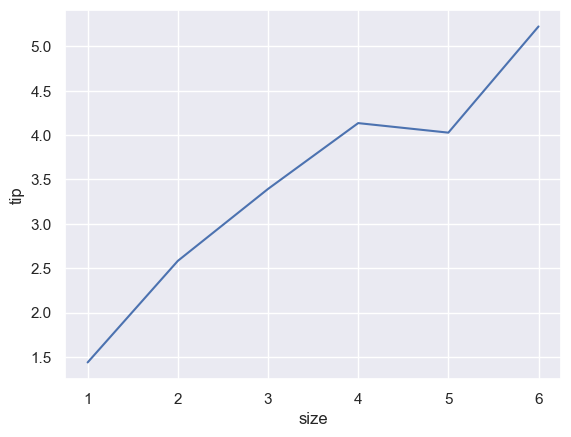

In [45]:
#Used to display the trend of a variable over time or some continuous index
sns.lineplot(x="size", y="tip", data=df,ci=None)
plt.show()

###### 3. Bar Plot

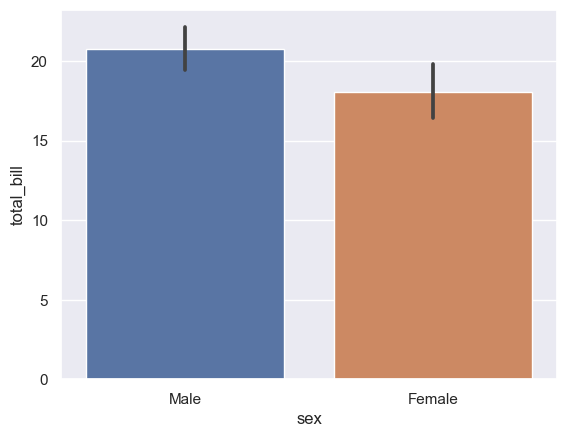

In [14]:
#Displays the relationship between a categorical variable and a continuous variable.
sns.barplot(x="sex", y="total_bill", data=df)
plt.show()

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


###### 4. Count Plot

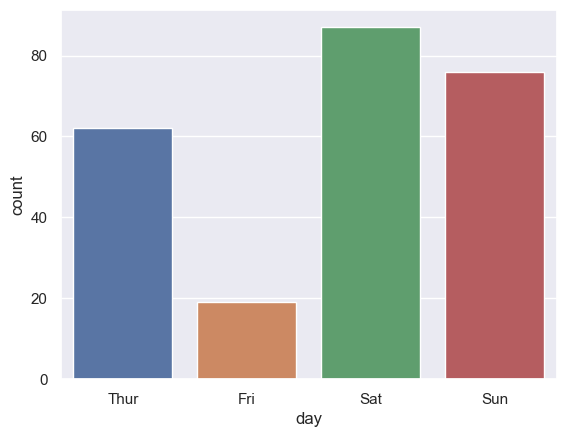

In [16]:
#Used to count the number of observations in each categorical bin.
sns.countplot(x="day", data=df)
plt.show()

###### 5. Box Plot

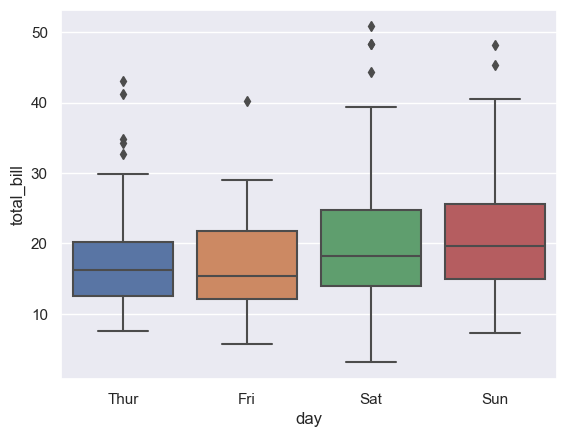

In [17]:
#Displays the distribution of a continuous variable and highlights outliers.

sns.boxplot(x="day", y="total_bill", data=df)
plt.show()

###### 6. Violin Plot

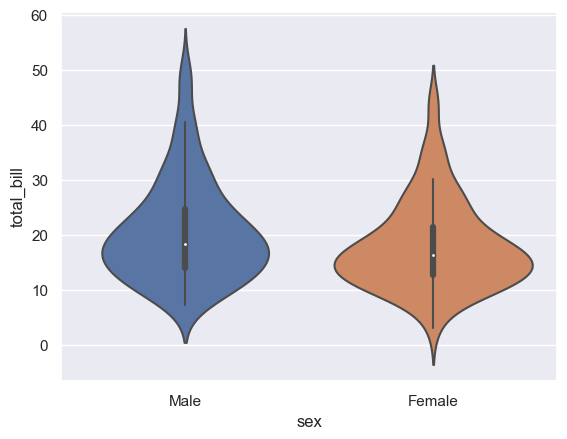

In [18]:
# Combines aspects of a box plot and a KDE plot to provide deeper insights into the distribution.
sns.violinplot(x="sex", y="total_bill", data=df)
plt.show()

###### 7. Swarm Plot

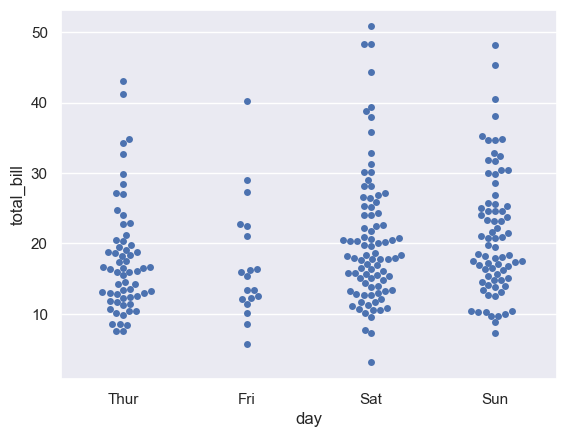

In [19]:
# A categorical scatter plot where points are adjusted to avoid overlapping
sns.swarmplot(x="day", y="total_bill", data=df)
plt.show()

######  8. Strip Plot

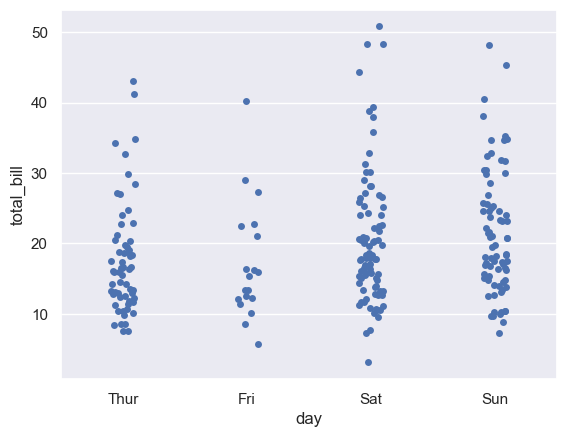

In [20]:
# A basic scatter plot for categorical data, often used in combination with a box or violin plot.

sns.stripplot(x="day", y="total_bill", data=df)
plt.show()

###### 9. Histogram

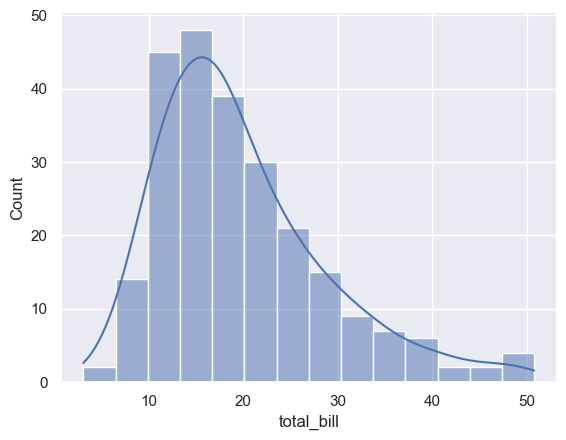

In [21]:
#Displays the distribution of a continuous variable.

sns.histplot(df["total_bill"], kde=True)
plt.show()

###### 10. KDE Plot

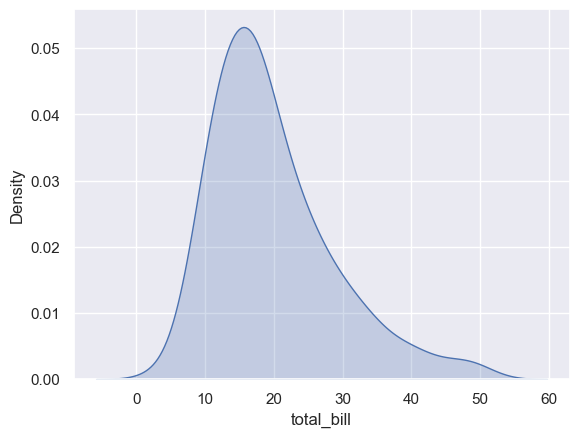

In [22]:
# Shows the distribution of a continuous variable, smoothed by a Gaussian kernel
sns.kdeplot(df["total_bill"], fill=True)
plt.show()

###### 11. Pair Plot

In [23]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


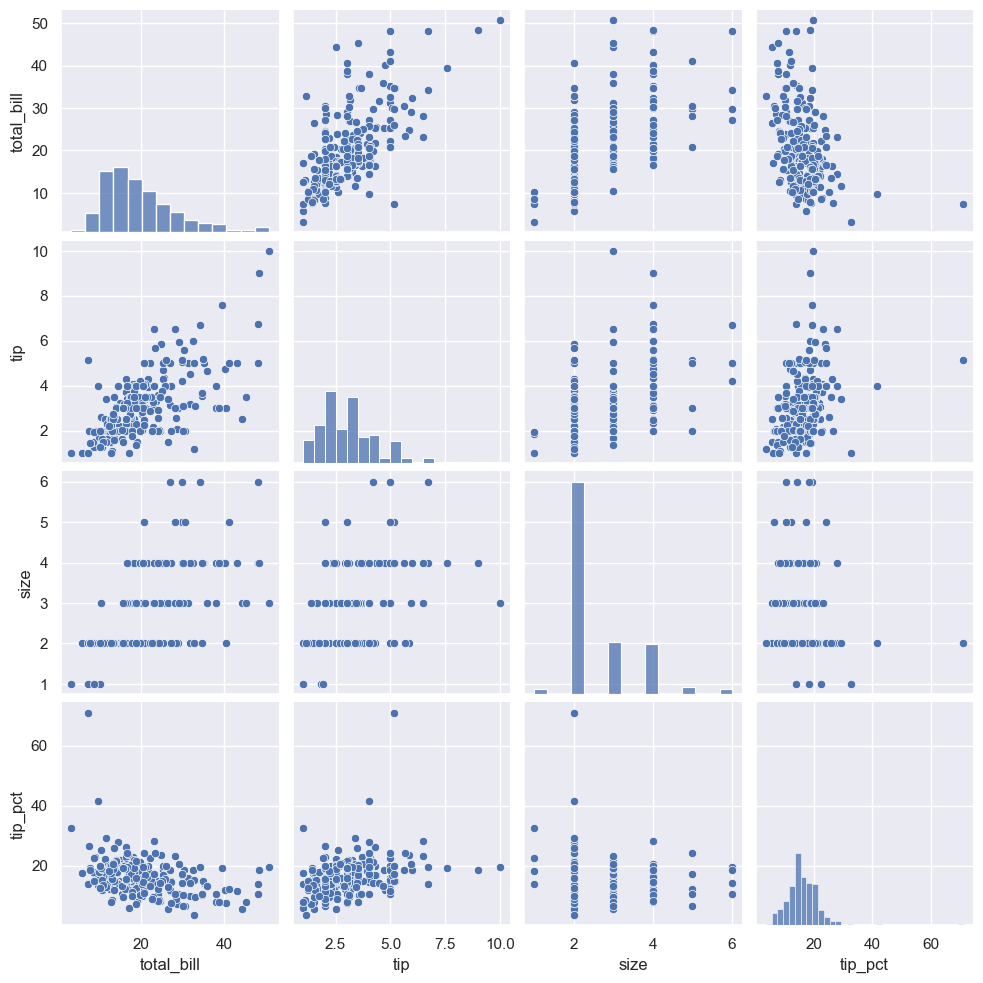

In [41]:
# Displays pairwise relationships across an entire dataframe. 
#Particularly useful for visualizing the relationships between numerical variables.
sns.pairplot(df)
plt.show()


In [25]:
iris=sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


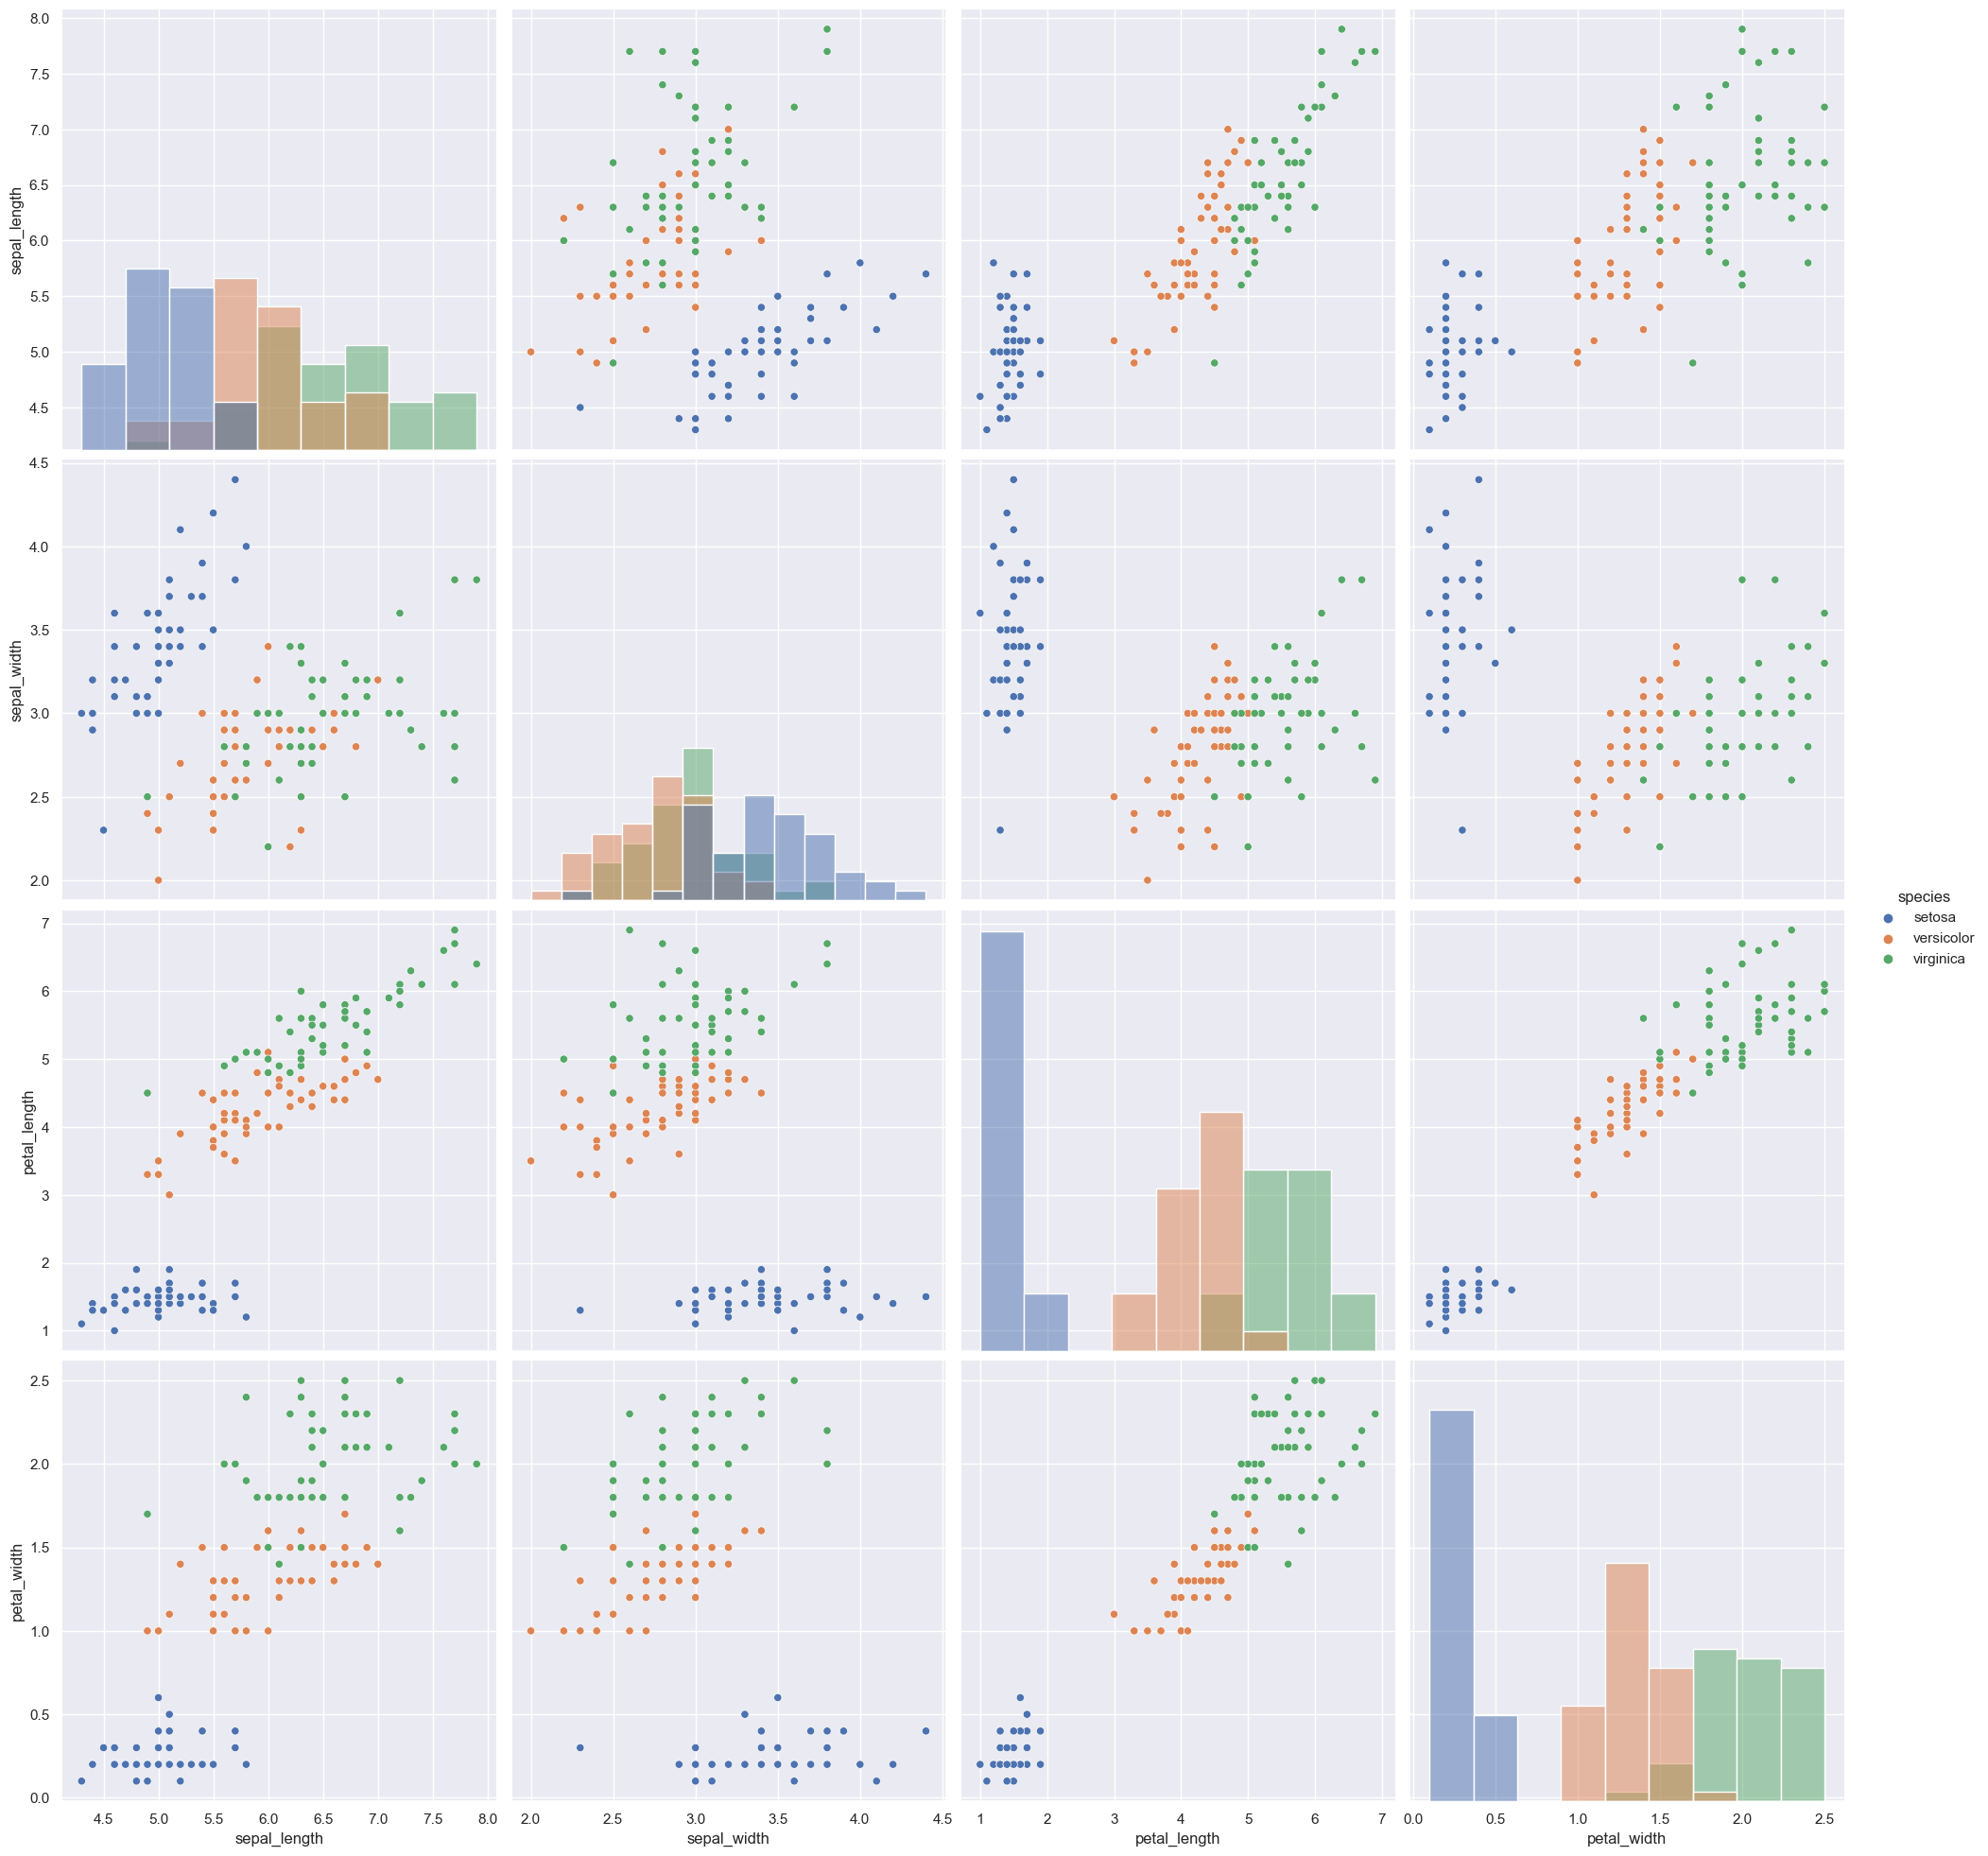

In [44]:
sns.pairplot(iris, hue='species',height=5,diag_kind='hist');

###### 12. Heatmap

In [52]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [51]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000000,244.000000,244,244,244,244,244.000000,244.000000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,16.080258
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,6.107220
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,3.563814
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,12.912736
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,15.476977
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,19.147549


In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<IPython.core.display.Javascript object>

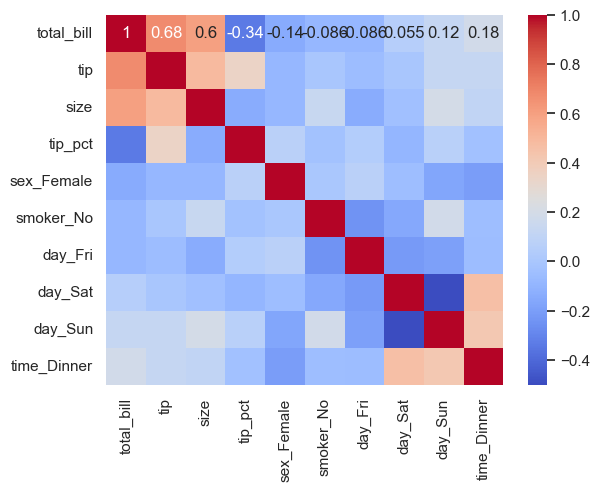

In [53]:
# Used to visualize data as a color-coded matrix. Often used for correlation matrices.
df1=pd.get_dummies(df, drop_first=True)
df1
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")
plt.show()

###### 13. FacetGrid

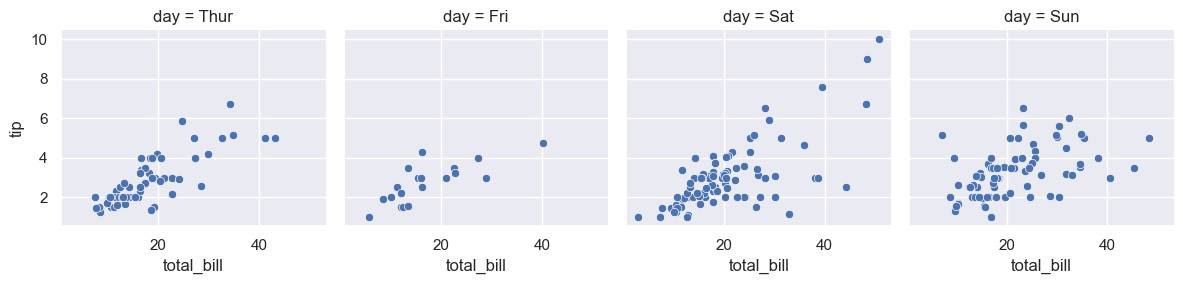

In [54]:
#Creates subplots of different subsets of your data using categorical variables.

g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

In [29]:
df['tip_pct'] = 100 * df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<IPython.core.display.Javascript object>

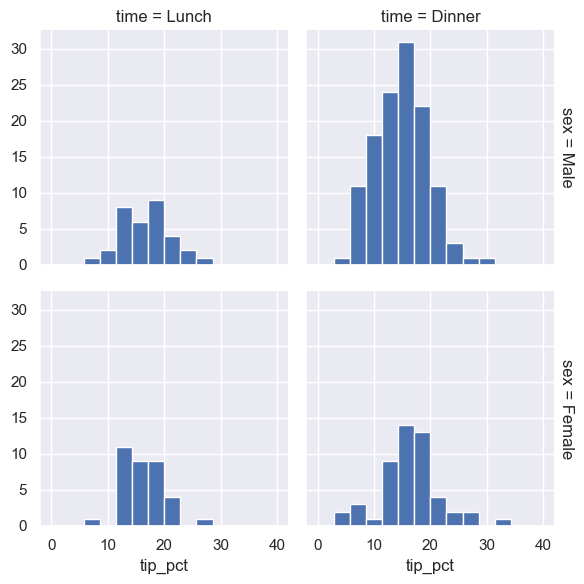

In [56]:
grid = sns.FacetGrid(df, row="sex", col="time",margin_titles=True)
grid.map(plt.hist,"tip_pct", bins=np.linspace(0, 40, 15));

###### 14. Joint Plot

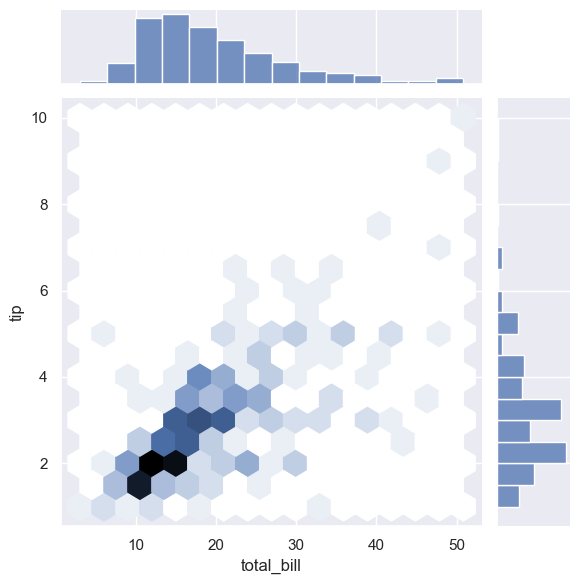

In [57]:
# Displays the relationship between two variables along with their individual distributions.

sns.jointplot(x="total_bill", y="tip", data=df, kind="hex")
plt.show()

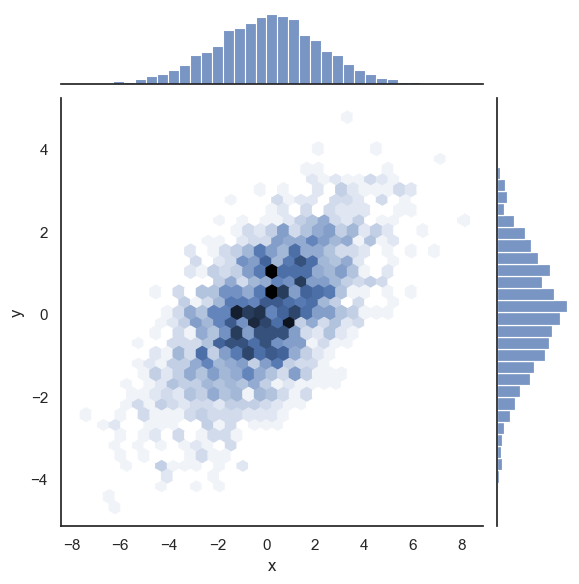

In [32]:
with sns.axes_style('white'):
    sns.jointplot(data=data,x="x",y="y", kind='hex')

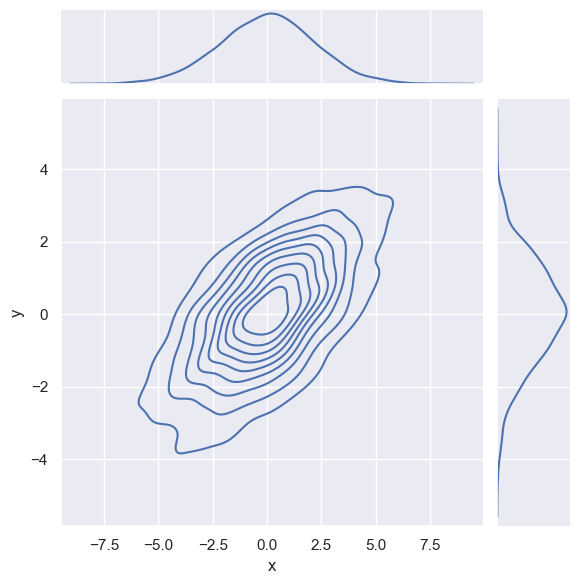

In [33]:
with sns.axes_style('darkgrid'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

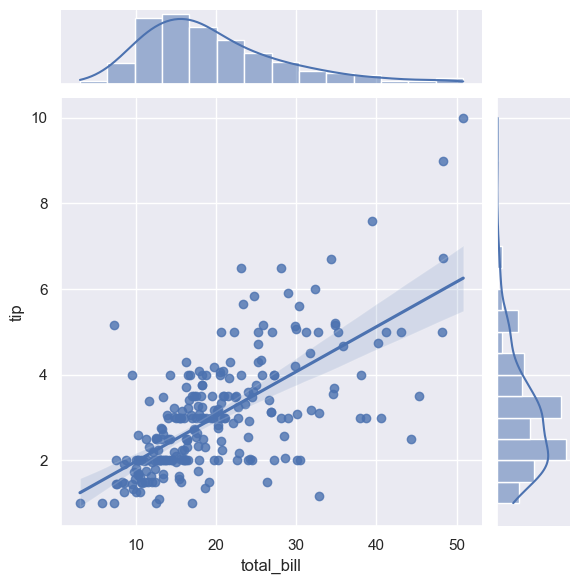

In [34]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='reg');

###### 15. PairGrid

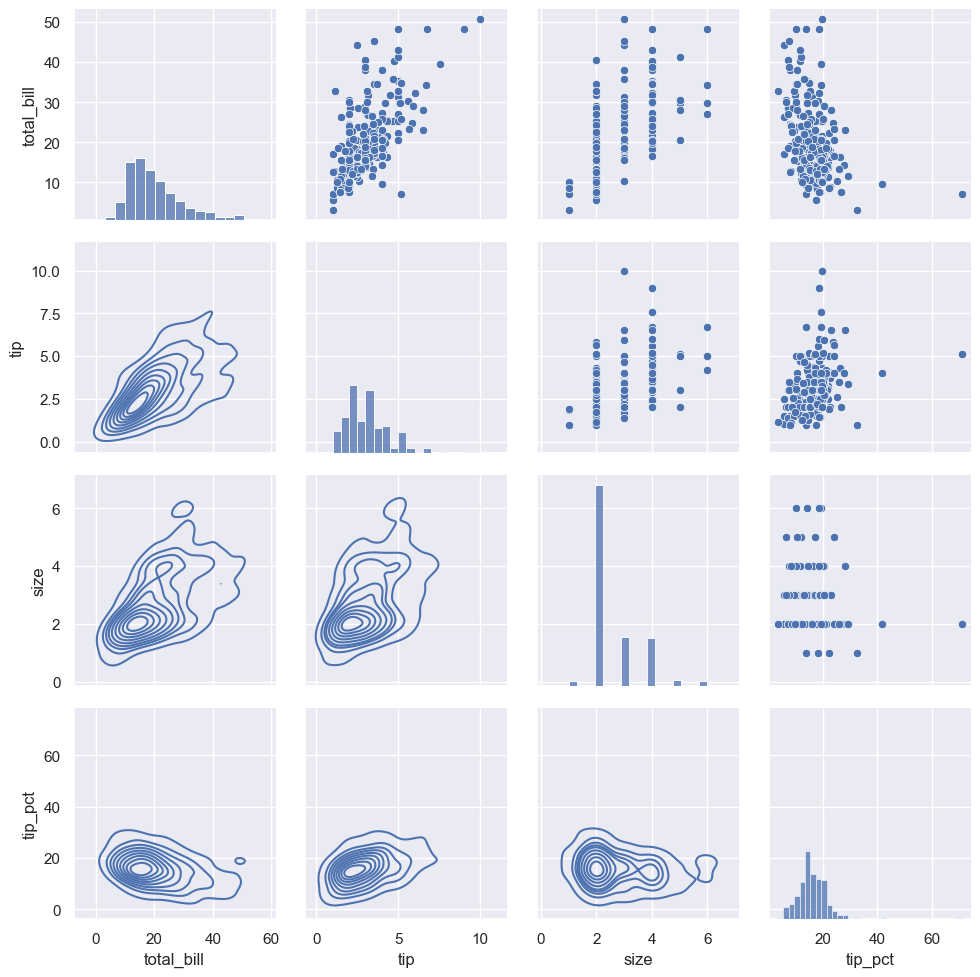

In [35]:
# Similar to pairplot, but with more flexibility to define how to plot different types of relationships.

g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)
plt.show()

###### 16. Catplot

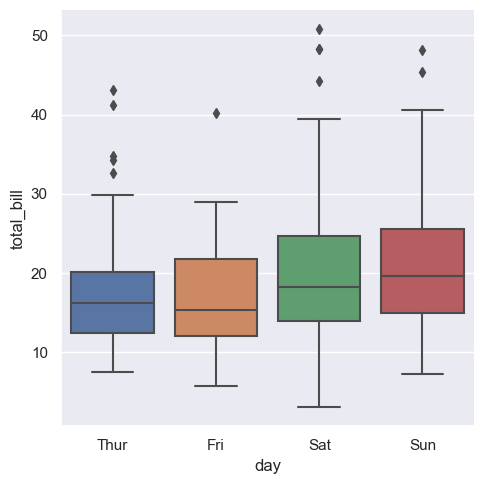

In [36]:
#Combines different categorical plots such as bar, box, strip, swarm, etc. into one flexible interface.

sns.catplot(x="day", y="total_bill", kind="box", data=df)
plt.show()

###### 17. Point Plot

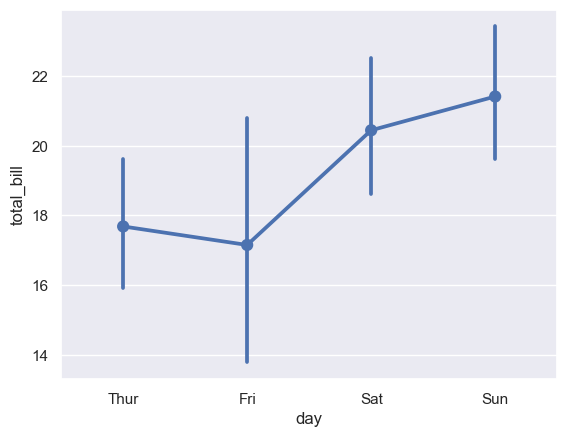

In [37]:
# Shows the mean value of a point and displays error bars to indicate confidence intervals.

sns.pointplot(x="day", y="total_bill", data=df)
plt.show()

###### 18. Regression Plot (LM Plot)

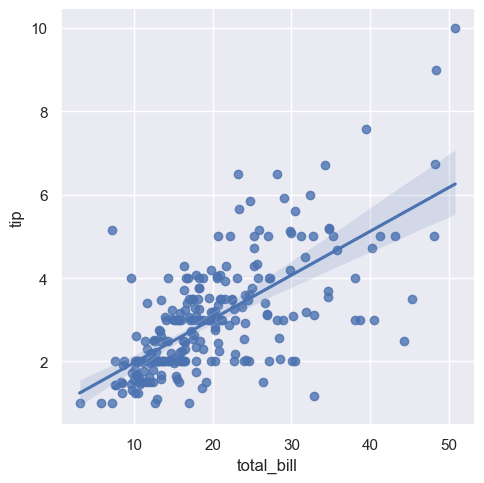

In [38]:
# Fits and plots a regression line along with confidence intervals.

sns.lmplot(x="total_bill", y="tip", data=df)
plt.show()

###### 19. Residual Plot

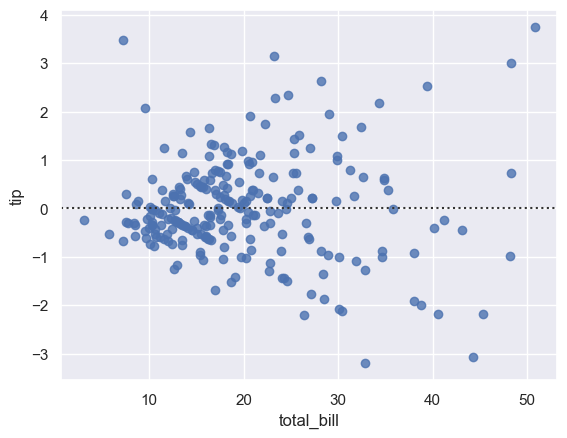

In [39]:
# Shows the residuals of a regression, helping to assess the quality of the fit.

sns.residplot(x="total_bill", y="tip", data=df)
plt.show()

###### 20. Matrix Plot (Clustermap)

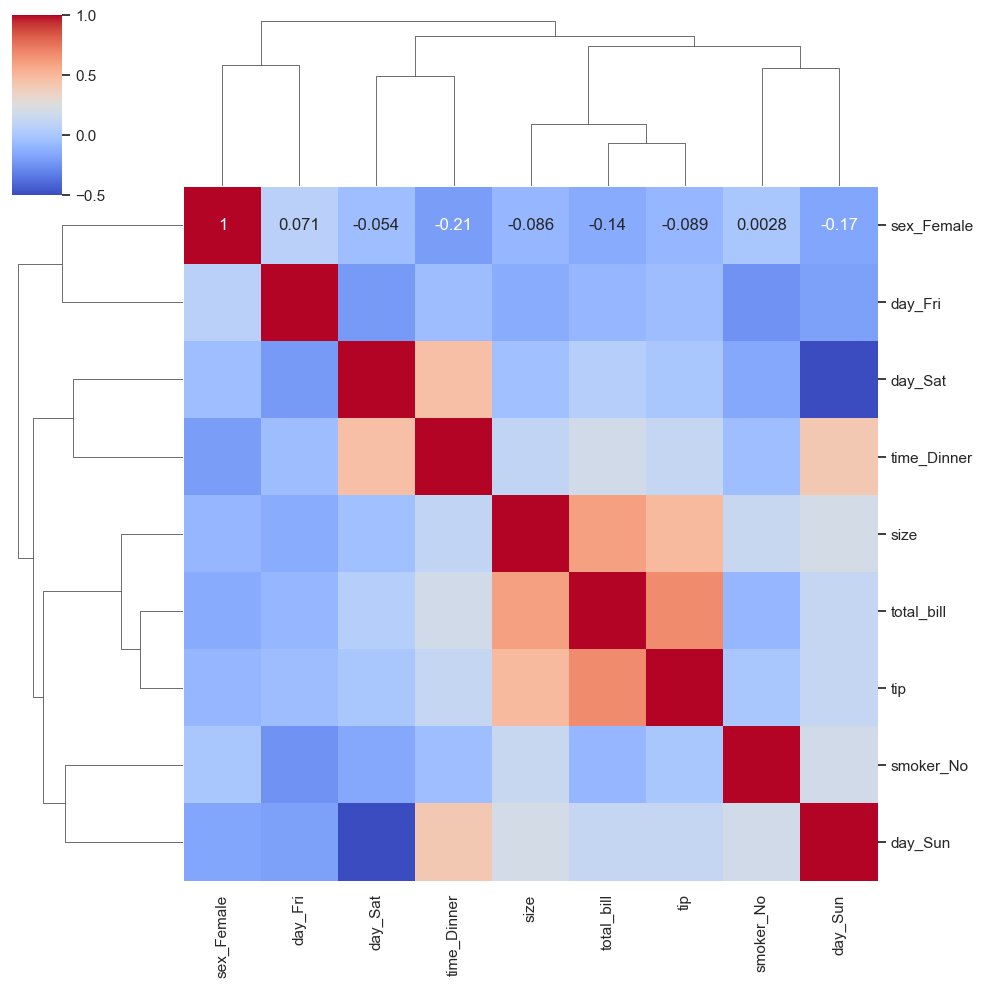

In [40]:
# Displays a matrix where rows and columns are reordered based on similarity.

sns.clustermap(df1.corr(), cmap="coolwarm", annot=True)
plt.show()